In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import mtist_utils as mu
from mtist import graphing_utils as gu

from glob import glob

%config InlineBackend.figure_format='retina'

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams.update({"font.family": "DejaVu Sans"})

rng = np.random.default_rng(11206)


In [2]:
meta = (
    pd.read_csv("../mtist1.0/mtist_datasets_copy/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

In [3]:
###########################################################################################################
# Obtain normal ES Scores for 
############################################################################################################

methods = ["default", "default_arithm", "ridge_CV", "ridge_CV_arithm"]
labels = ["L", "L2"]

################################################################################

es = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_copy/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

In [4]:
expanded_nulls = {
    n_species: pd.read_csv(f"null_models/null_df_{n_species}sp.csv")
    .drop(columns=["Unnamed: 0"])[f"{n_species}-sp_null"]
    .values
    for n_species in [3, 10, 100]
}

display(expanded_nulls)

{3: array([0.33333333, 0.55555556, 0.66666667, ..., 0.66666667, 0.44444444,
        0.33333333]),
 10: array([0.51190476, 0.42857143, 0.55952381, ..., 0.44047619, 0.54761905,
        0.51190476]),
 100: array([0.51755652, 0.49446849, 0.46320346, ..., 0.49350649, 0.48100048,
        0.49254449])}

In [5]:
data = pd.DataFrame(es)
display(data)

,default,default_arithm,ridge_CV,ridge_CV_arithm
0,0.531506,0.504570,0.540164,0.540645
1,0.514190,0.519962,0.538721,0.539202
2,0.509380,0.507456,0.521405,0.522848
3,0.523810,0.517557,0.542569,0.548822
4,0.520924,0.531025,0.534392,0.532468
...,...,...,...,...
643,1.000000,1.000000,1.000000,1.000000
644,1.000000,0.888889,1.000000,0.888889
645,1.000000,1.000000,1.000000,1.000000
646,1.000000,1.000000,1.000000,1.000000


In [6]:
data.mean(0)

default            0.868538
default_arithm     0.871301
ridge_CV           0.864806
ridge_CV_arithm    0.867416
dtype: float64

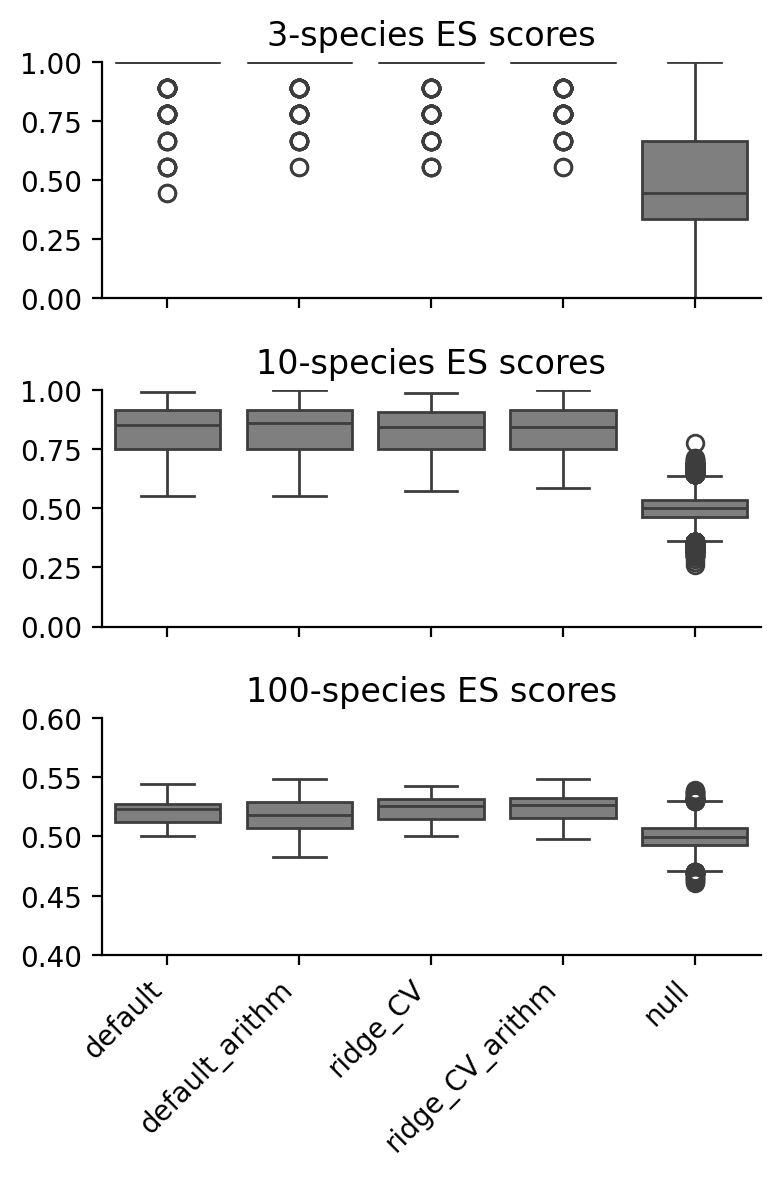

In [7]:
order = methods + ["null"]

fig, axes = gu.easy_subplots(nrows=3, base_figsize=(4, 2), sharex=True, sharey=False)

for n_species, ax in zip([3, 10, 100], axes):
    sns.boxplot(
        data=(
            pd.Series(expanded_nulls[n_species])
            .to_frame("null")
            .join(data.loc[meta.query("n_species == @n_species").index])[order]
        ),
        ax=ax,
        color="tab:gray",
    )

    ax.set_title(f"{n_species}-species ES scores")

plt.xticks(rotation=45, ha="right")
# plt.xticks(range(len(order)), labels + ["Null"])

axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[2].set_ylim(0.44, 0.56)
axes[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

Arithmetic means lead to a slightly higher average ES score than geometric means:

In [8]:
data.mean(0)

default            0.868538
default_arithm     0.871301
ridge_CV           0.864806
ridge_CV_arithm    0.867416
dtype: float64

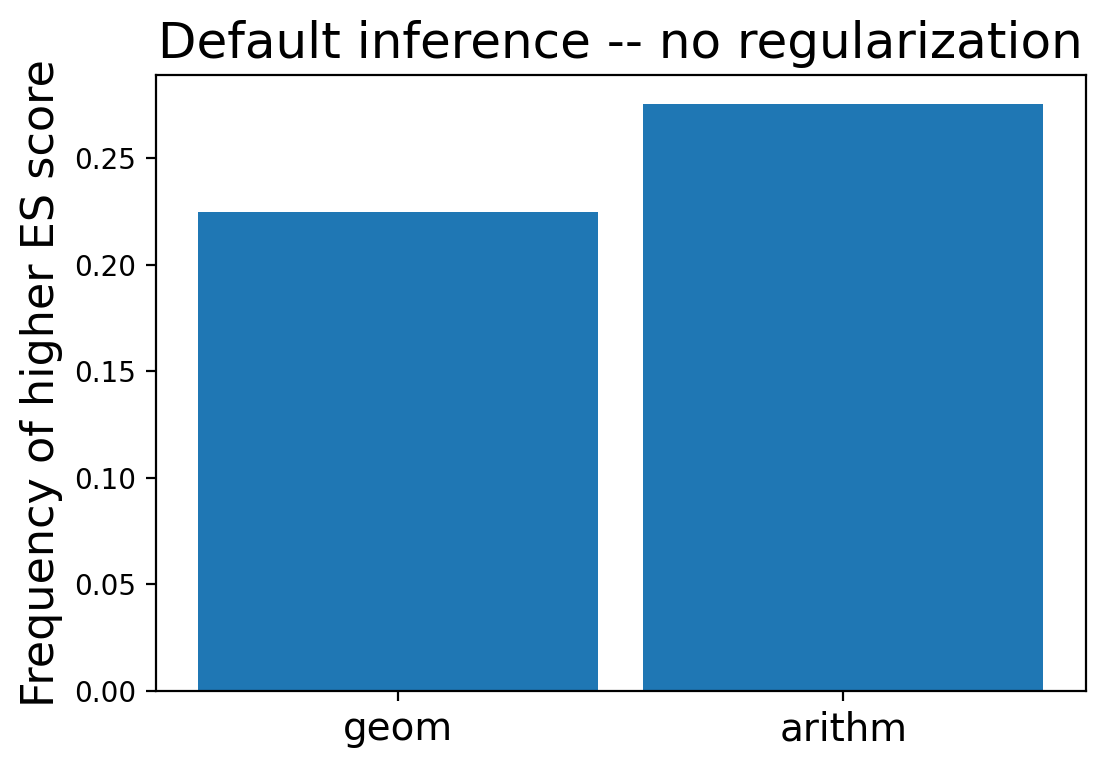

In [9]:
es_diff = data.default_arithm-data.default
es_diff = es_diff[es_diff!=0]

plt.figure(figsize=(6,4))
plt.hist(np.sign(es_diff), bins=[-2, 0, 2], rwidth=0.9, density=True)
plt.xticks([-1, 1], labels=["geom", "arithm"], fontsize=14)
plt.ylabel("Frequency of higher ES score", fontsize=16)
plt.title("Default inference -- no regularization", fontsize=18)
plt.show()

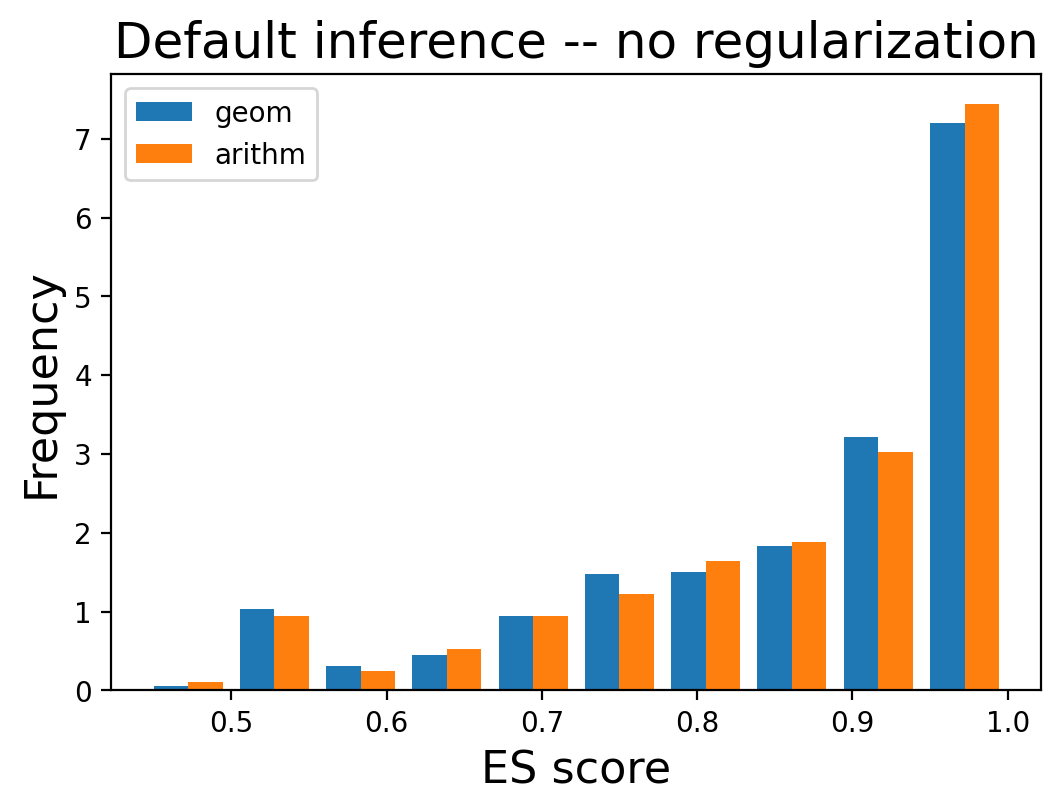

In [10]:
plt.figure(figsize=(6,4))
plt.hist(data[["default", "default_arithm"]], label=["geom", "arithm"], density=True)
plt.legend()
plt.xlabel("ES score", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Default inference -- no regularization", fontsize=18)
plt.show()

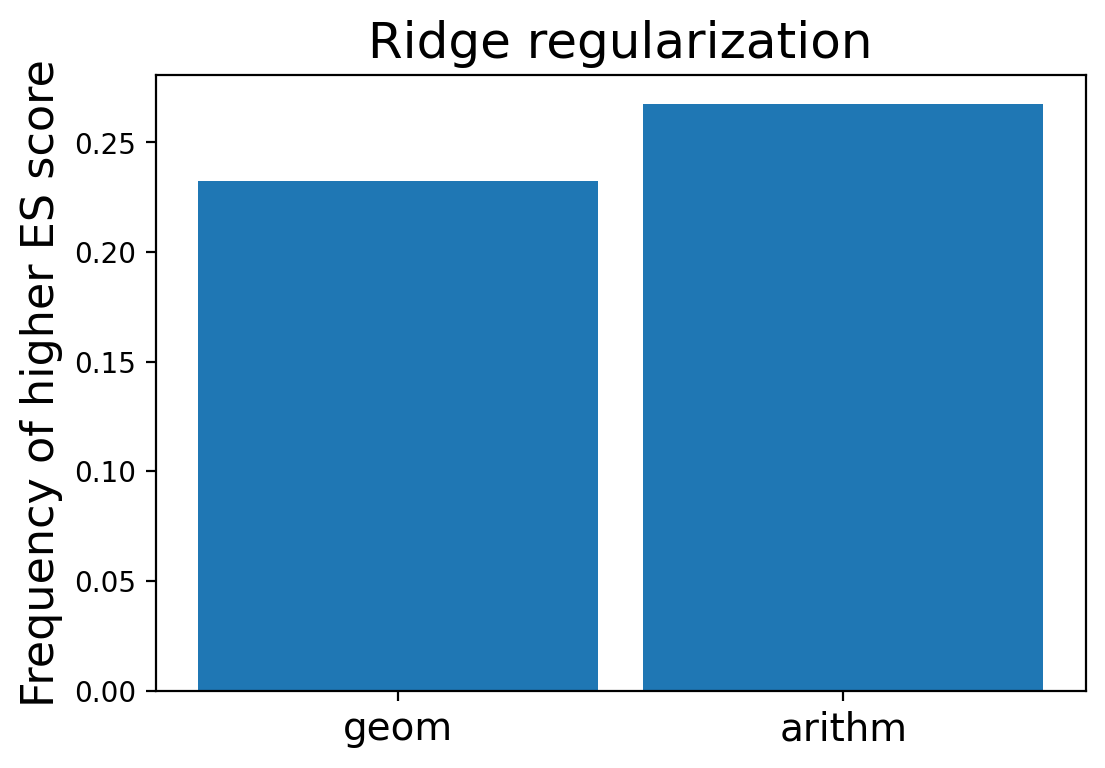

In [11]:
es_diff = data.ridge_CV_arithm-data.ridge_CV
es_diff = es_diff[es_diff!=0]

plt.figure(figsize=(6,4))
plt.hist(np.sign(es_diff), bins=[-2, 0, 2], rwidth=0.9, density=True)
plt.xticks([-1, 1], labels=["geom", "arithm"], fontsize=14)
plt.ylabel("Frequency of higher ES score", fontsize=16)
plt.title("Ridge regularization", fontsize=18)
plt.show()

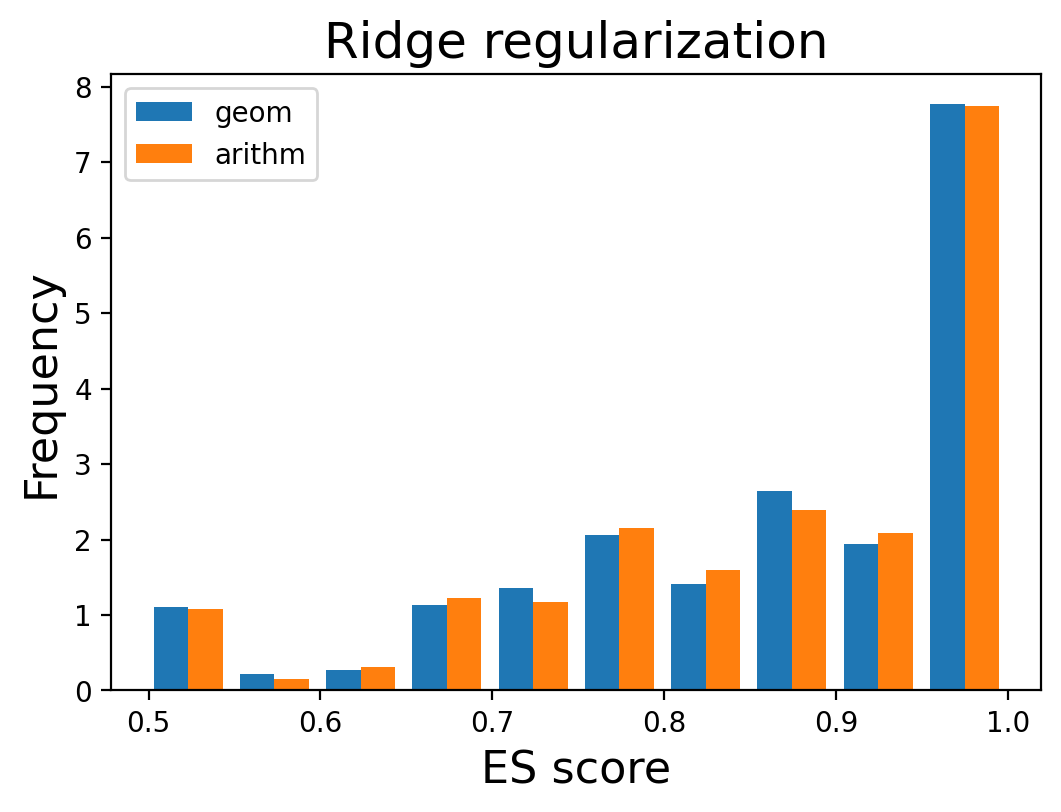

In [12]:
plt.figure(figsize=(6,4))
plt.hist(data[["ridge_CV", "ridge_CV_arithm"]], label=["geom", "arithm"], density=True)
plt.legend()
plt.xlabel("ES score", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Ridge regularization", fontsize=18)
plt.show()